# 데이터 특징보기

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import re

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [15]:
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


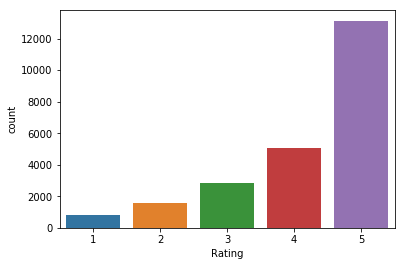

In [6]:
sns.countplot(x="Rating", data=data)
plt.show()

In [9]:
matrix=data.as_matrix()

/Users/kakao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


# Title, Review

In [28]:
data=pd.read_csv('out3.csv')
data=data.drop('Unnamed: 0',axis=1)
matrixdata=data.as_matrix()

/Users/kakao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
pos_title=[]
pos_review=[]
neg_title=[]
neg_review=[]
neu_title=[]
neu_review=[]
for i in matrixdata:
    if i[3]==4 or i[3]==5:
        pos_title.extend(re.sub(r'[^\w\s]','',str(i[1]).lower()).split())
        pos_review.extend(re.sub(r'[^\w\s]','',str(i[2]).lower()).split())
    elif i[3]==3:
        neu_title.extend(re.sub(r'[^\w\s]','',str(i[1]).lower()).split())
        neu_review.extend(re.sub(r'[^\w\s]','',str(i[2]).lower()).split())
    else:
        neg_title.extend(re.sub(r'[^\w\s]','',str(i[1]).lower()).split())
        neg_review.extend(re.sub(r'[^\w\s]','',str(i[2]).lower()).split())

In [32]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [35]:
negatives=[]
for i in stop:
    if "'t"in i:
        negatives.append(i)

negative=[]
for i in negatives:
    negative.append(re.sub(r'[^\w\s]','',i))

In [43]:
posnum=0
negnum=0
neunum=0
for i in pos_title+pos_review:
    if i in negative:
        posnum+=1
for i in neg_title+neg_review:
    if i in negative:
        negnum+=1
for i in neu_title+neu_review:
    if i in negative:
        neunum+=1

In [46]:
print(posnum/len(pos_title+pos_review),negnum/len(neg_title+neg_review),neunum/len(neu_title+neu_review))

0.00479733367516985 0.0068578691831893525 0.007264021250320386


In [47]:
othereffecters=['but', 'more', 'most', 'no', 'not', 'off', 'too']

In [48]:
posnum1=0
negnum1=0
neunum1=0
for i in pos_title+pos_review:
    if i in othereffecters:
        posnum1+=1
for i in neg_title+neg_review:
    if i in othereffecters:
        negnum1+=1
for i in neu_title+neu_review:
    if i in othereffecters:
        neunum1+=1

In [49]:
print(posnum1/len(pos_title+pos_review),negnum1/len(neg_title+neg_review),neunum1/len(neu_title+neu_review))

0.027386232534290476 0.037814349795668015 0.04063657757997996
